# TheClairvoyantConstructor

# Goals
You are a data scientist at a large construction company. In order to submit more competitive bids for contracts, the head of analytics and data science would like you to work on forecasting core construction material costs. You have access to the pricing information (per unit, in dollars) for the company’s past purchases of plywood, sheetrock, steel beams, rebar, and glass contracts over the past ten years in csv format. 

Currently, the company is able to purchase futures contracts in a material for up to six months in advance. Thus, your manager is most interested in forecasting the price of each commodity up to six months into the future. In particular, your manager feels it would be really useful to understand when a commodity price is about to increase temporarily, in order to either buy the commodity early or wait until after the temporary increase. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pandas_profiling import ProfileReport

In [19]:
# Read in the data for EDA. 
data = pd.read_csv('construction_material_prices_2008_2018.csv', low_memory=False)
df = data.copy()
df_cols = list(df)

In [23]:
profile = ProfileReport(df)
profile

Text(0.5, 0, 'Date')

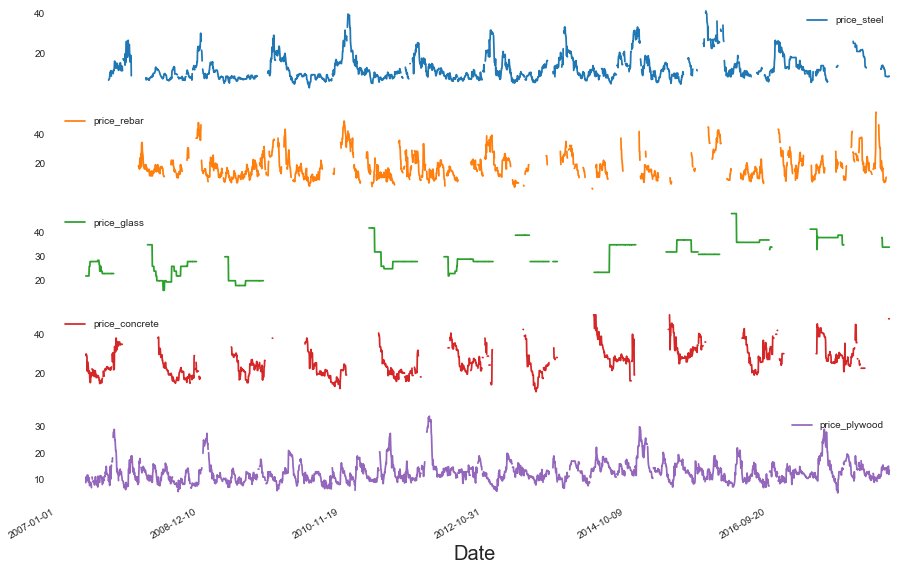

In [28]:
# Take a look at what the time-series look like visually
df_plot = df.set_index('Unnamed: 0')
df_plot.plot(subplots=True, figsize=(15, 10))
plt.xlabel('Date', fontsize=20)

In [ ]:
# Same visualization as above using interpolated vals

df_interpol['readvalue'] = df_interpol['readvalue'].interpolate()

# Checklist
1. Frame the problem and look at the big picture.
1. Get the data.
1. Explore the data to gain insights.
1. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
1. Explore many different models and shortlist the best ones.
1. Fine-tune your models and combine them into a great solution.
1. Present your solution.
1. Launch, monitor, and maintain your system.

## Frame the problem. 
1. Define the objective in business terms.
1. How will your solution be used?
1. What are the current solutions/workarounds (if any)?
1. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
1. How should performance be measured?
1. Is the performance measure aligned with the business objective?
1. What would be the minimum performance needed to reach the business objective?
1. What are comparable problems? Can you reuse experience or tools?
1. Is human expertise available?
1. How would you solve the problem manually?
1. List the assumptions you (or others) have made so far.
1. Verify assumptions if possible.

## Get the Data
1. Problems with data stewardship?
1. List the data you need and how much you need.
1. Find and document where you can get that data.
1. Check how much space it will take.
1. Check legal obligations, and get authorization if necessary.
1. Get access authorizations.
1. Create a workspace (with enough storage space).
1. Get the data.
1. Convert the data to a format you can easily manipulate (without changing the data itself).
1. Ensure sensitive information is deleted or protected (e.g., anonymized).
1. Check the size and type of data (time series, sample, geographical, etc.).
1. Sample a test set, put it aside, and never look at it (no data snooping!).

## Explore the Data
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
1. Create a Jupyter notebook to keep a record of your data exploration.
1. Study each attribute and its characteristics:
    1. Name
    1. Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    1. % of missing values
    1. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    1. Usefulness for the task
    1. Type of distribution (Gaussian, uniform, logarithmic, etc.)
1. For supervised learning tasks, identify the target attribute(s).
1. Visualize the data.
1. Study the correlations between attributes.
1. Study how you would solve the problem manually.
1. Identify the promising transformations you may want to apply.
1. Identify extra data that would be useful (go back to “Get the Data” ).
1. Document what you have learned.

## Prepare the Data
1. Work on copies of the data (keep the original dataset intact).
1. Write functions for all data transformations you apply, for five reasons:
1. So you can easily prepare the data the next time you get a fresh dataset
1. So you can apply these transformations in future projects
1. To clean and prepare the test set
1. To clean and prepare new data instances once your solution is live
1. To make it easy to treat your preparation choices as hyperparameters
1. Data cleaning:
    1. Fix or remove outliers (optional).
    1. Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).
1. Feature selection (optional):
    1. Drop the attributes that provide no useful information for the task.
1. Feature engineering, where appropriate:
    1. Discretize continuous features.
    1. Decompose features (e.g., categorical, date/time, etc.).
    1. Add promising transformations of features (e.g., log( x ), sqrt( x ), x 2 , etc.).
    1. Aggregate features into promising new features.
1. Feature scaling:
    1. Standardize or normalize features.

## Shortlist Promising Models
1. If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
1. Once again, try to automate these steps as much as possible.
1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
1. Measure and compare their performance.
    1. For each model, use N fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
1. Analyze the most significant variables for each algorithm.
1. Analyze the types of errors the models make.
    1. What data would a human have used to avoid these errors?
1. Perform a quick round of feature selection and engineering.
1. Perform one or two more quick iterations of the five previous steps.
1. Shortlist the top three to five most promising models, preferring models that make different types of errors.

## Fine-Tune the System
1. You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
1. As always, automate what you can.
1. Fine-tune the hyperparameters using cross-validation:
    1. Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
    1. Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.).
1. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
1. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

## Present Your Solution
1. Document what you have done.
1. Create a nice presentation.
1. Make sure you highlight the big picture first.
1. Explain why your solution achieves the business objective.
1. Don’t forget to present interesting points you noticed along the way.
1. Describe what worked and what did not.
1. List your assumptions and your system’s limitations.
1. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., “the median income is the number-one predictor of housing prices”).

## Launch!
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).
1. Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops.
    1. Beware of slow degradation: models tend to “rot” as data evolves.
    1. Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
    1. Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale). This is particularly important for online learning systems.
1. Retrain your models on a regular basis on fresh data (automate as much as possible ).